In [42]:

import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage.filters import threshold_sauvola
from skimage import img_as_ubyte

# A command line argument.
input_name = "C:/Users/dartix/PycharmProjects/kiv-zvi/SP/data_katastr/UAZK-B2-a-04-C-1425-002.JPG"





##### LOADING BW

In [43]:
def load_BW():
    return cv2.imread(input_name, cv2.IMREAD_GRAYSCALE)


#### LOADING COLORED

In [44]:
# It reads the image from the file.
def load_colored():
    # img = img[:,:,0]
    return cv2.cvtColor((cv2.imread(input_name,  cv2.COLOR_BGR2RGB)),  cv2.COLOR_BGR2RGB)

- convolving image by horizontal line detection mask

In [45]:
def convolve_horizontal_lightly(img):
    kernel_horizontal_lines = np.array([[-1,-1,-1],
                                    [2, 2, 2],
                                    [-1,-1,-1]])

    return cv2.filter2D(img, -1, kernel_horizontal_lines)

- convolving image by vertical line detection mask

In [46]:
def convolve_vertical_lightly(img):
    kernel_horizontal_lines = np.array([[-1,2,-1],
                                    [-1, 2, -1],
                                    [-1,2,-1]])

    return cv2.filter2D(img, -1, kernel_horizontal_lines)

- A Canny edge detector 

In [47]:
# img = cv2.Canny(img, 1, 500)

[[5 5 5]
 [5 5 5]
 [5 5 5]]


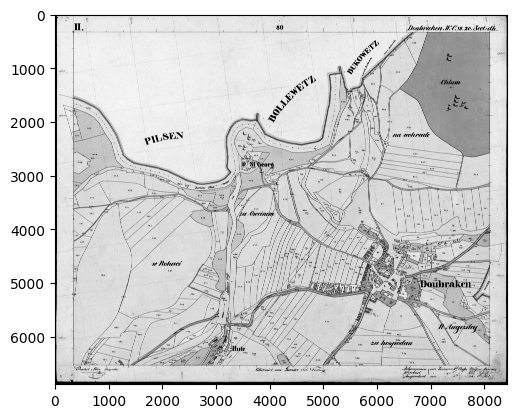

In [48]:
img = load_BW()

assert img is not None, "file could not be read, check with os.path.exists()"

kernel = np.ones((3,3), np.uint8)
kernel[:,:] = 5
print(kernel)
img = cv2.erode(img, kernel)
# img = cv2.bitwise_not(img)
plt.imshow(img, cmap="gray")

In [49]:

# ret, thresh1 = cv2.threshold(img,100,155,cv2.THRESH_OTSU)

# plt.imshow(thresh1, cmap="gray")
# img = thresh1

In [50]:
# sauvola = (cv2.imread(input_name, cv2.IMREAD_GRAYSCALE))
# assert img is not None, "file could not be read, check with os.path.exists()"
# sauvola = threshold_sauvola(img, window_size=5, k=0.1)

# plt.imshow(sauvola, cmap="gray")
# img = sauvola

In [51]:
def get_sizes_procentual(procentual: float):
    # Taking the right xx% of the image.
    right_border = int(img.shape[1] * procentual)
    # Taking the left xx% of the image.
    left_border = int(img.shape[1] * (1 - procentual))
    # Taking the bottom xx% of the image.
    bottom_border = int(img.shape[0] * procentual)
    # Taking the top xx% of the image.
    top_border = int(img.shape[0] * (1 - procentual))
    return right_border, left_border, bottom_border, top_border

68 6814 84 8337
(6883, 8422)


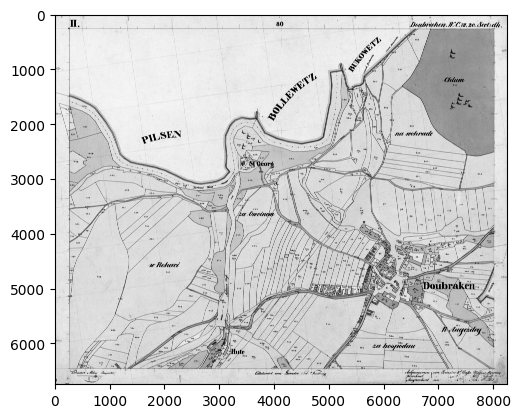

In [52]:
right_border, left_border, bottom_border, top_border = get_sizes_procentual(0.01)
print(bottom_border, top_border, right_border, left_border)
print(img.shape)
img = img[bottom_border:top_border, right_border:left_border]

plt.imshow(img, cmap="gray")


In [53]:
# Taking the right 90% of the image.
right_border = int(img.shape[1] * 0.9)
# Taking the left 10% of the image.
left_border = int(img.shape[1] * 0.1)
# Taking the bottom 90% of the image.
bottom_border = int(img.shape[0] * 0.9)
# Taking the top 10% of the image.
top_border = int(img.shape[0] * 0.1)

# Taking the right, left, bottom and top border of the image.
right_border = img[:, right_border:]
left_border = img[:, :left_border]
bottom_border = img[bottom_border:, :]
top_border = img[:top_border, :]
print(top_border.shape)
# top_border = top_border.astype(int)
# top_border = img_as_ubyte(top_border)
print(top_border[:5])

(674, 8253)
[[199 197 195 ... 172 173 173]
 [197 197 195 ... 172 175 177]
 [193 193 197 ... 176 176 175]
 [193 193 196 ... 176 176 172]
 [193 193 196 ... 176 176 172]]


In [54]:
def euclidean_2D(x1, x2, y1, y2):
    return np.sqrt((x1-x2)**2 + (y1-y2)**2)

def get_vertical(x1, x2, y1, y2, theta=0.1, min_value=10):
    """
    computes if is line vertical or horisontal like by parameters theta as and min_value
    """

    if np.square(x1 - x2) < theta and np.square(y1 - y2) > min_value:
        return True
    elif np.square(x1 - x2) > min_value and np.square(y1 - y2) < theta:
        return False

    




def make_line_detection(border, horisontal_only=False, vertical_only=False):

    if horisontal_only:
        for _ in range(9):
            border = convolve_horizontal_lightly(border)
    elif vertical_only:
        for _ in range(9):
            border = convolve_vertical_lightly(border)

    # Create default parametrization LSD
    lsd = cv2.createLineSegmentDetector(0)

    # Detect lines in the image
    lines = lsd.detect(border)[0]  # Position 0 of the returned tuple are the detected lines
    lines = np.squeeze(lines)

    
    # directions = np.array([get_vertical(i[0], i[2], i[1], i[3], 0.1, 20)  for i in lines])
    # vertical = lines[directions == False,:]
    # print("vertical", vertical.shape)
    # horisontal = lines[directions == True,:]
    # print("horisontal", horisontal.shape)

    # if horisontal_only:
    #     lines = horisontal

    # elif vertical_only:
    #     lines = vertical


    print(lines.shape)
    distances = np.array([euclidean_2D(i[0], i[2], i[1], i[3],)  for i in lines])
    print("distances.shape", distances.shape)

    print(distances.shape)
    plt.plot(np.arange(0, len(distances)), distances)
    plt.show()
    longest_lines = lines[distances > np.percentile(distances, 90)]
    print("longest_lines.shape", longest_lines.shape)

    longest_lines = longest_lines.astype(int)
    print(longest_lines)

    # Draw detected lines in the image
    for i in longest_lines:
        border = cv2.line(border, (i[0], i[1]), (i[2], i[3]), (255, 0, 0))
    print(border.shape)
    # It converts the image from BGR to grayscale.
    drawn_img = cv2.cvtColor(white, cv2.COLOR_BGR2GRAY)
    plt.imshow(border, cmap='gray')
    # return border

(29052, 4)
distances.shape (29052,)
(29052,)


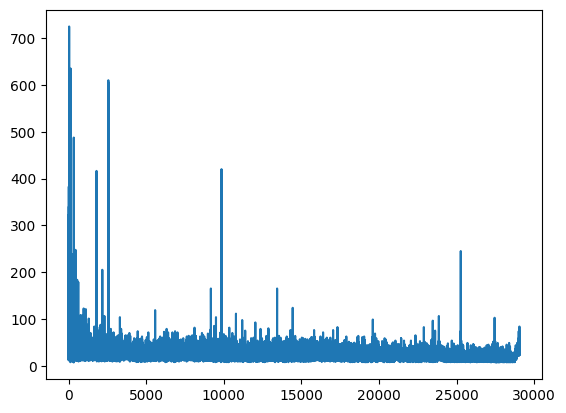

longest_lines.shape (2906, 4)
[[ 569 2835  569 2514]
 [ 570  629  569  583]
 [ 569  394  569  349]
 ...
 [ 575 1739  575 1778]
 [ 575 2753  575 2836]
 [ 574 1728  574 1655]]
(6746, 826)


NameError: name 'white' is not defined

In [55]:
make_line_detection(right_border, vertical_only=True)

(29776, 4)
distances.shape (29776,)
(29776,)


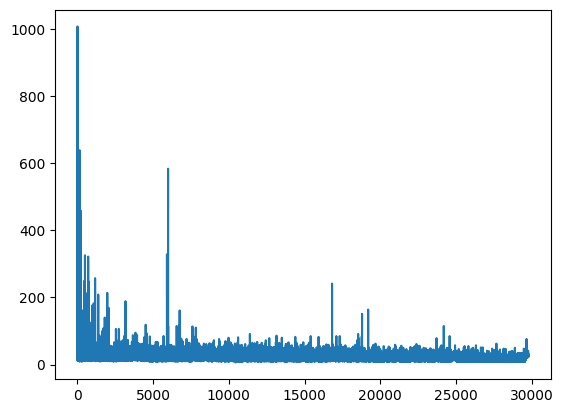

longest_lines.shape (2978, 4)
[[ 259 2304  259 1883]
 [ 263 3976  264 4138]
 [ 380  103  379  148]
 ...
 [ 374 6084  374 6119]
 [ 515 4626  515 4665]
 [ 363 1239  363 1198]]
(6746, 825)


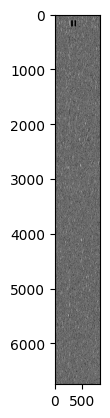

In [ ]:
make_line_detection(left_border, vertical_only=True)

(29347, 4)
distances.shape (29347,)
(29347,)


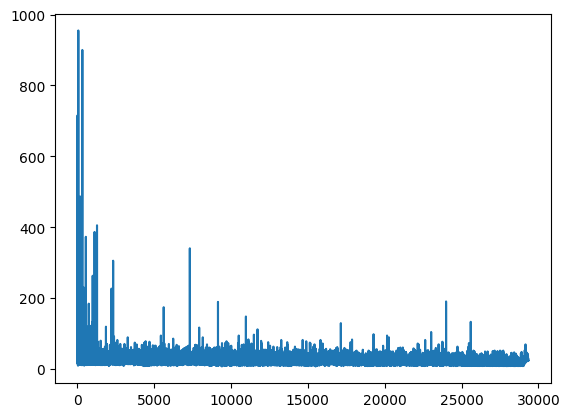

longest_lines.shape (2935, 4)
[[3584  269 2901  268]
 [2956  264 3041  264]
 [2689  264 2770  264]
 ...
 [ 628  508  666  508]
 [4094  275 4059  275]
 [2229  410 2191  410]]
(674, 8253)


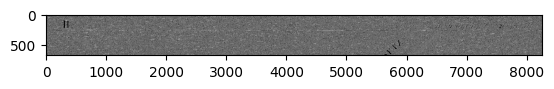

In [ ]:
make_line_detection(top_border, horisontal_only=True)

(27536, 4)
distances.shape (27536,)
(27536,)


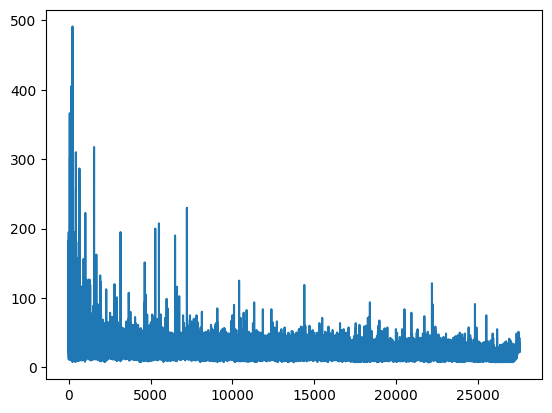

longest_lines.shape (2754, 4)
[[3958  399 3859  398]
 [6990  279 7078  279]
 [4069  398 3979  398]
 ...
 [3408  401 3356  400]
 [  69    0   33    0]
 [2414  400 2371  400]]
(675, 8253)


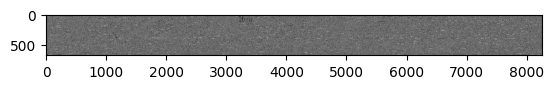

In [ ]:
make_line_detection(bottom_border, horisontal_only=True)
